In [51]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

data_dir_base = '/ocean/projects/atm170004p/jakhar/2d_emulator_vision/SSL-for-2D-Turbulence/results/BASE/BASE_seed_0_2phase_1000epochs/analysis/emulate/'
# data_dir_truth = '/ocean/projects/atm170004p/jakhar/2d_emulator_vision/SSL-for-2D-Turbulence/results/BASE/BASE_seed_0_2phase_1000epochs/analysis/truth/'
# data_dir_truth = '/ocean/projects/atm170004p/jakhar/2d_emulator_vision/SSL-for-2D-Turbulence/results/MAE_FINETUNE/MAE_mr0.5_seed_0_2phase_ft_dropPR/analysis/truth/'
data_dir_truth = '/ocean/projects/atm170004p/jakhar/2d_emulator_vision/SSL-for-2D-Turbulence/results/SMAE_FINETUNE/SMAE_seed_0_2phase_spatial_pixelonly_targetfull_0031_ft_dropPR/analysis/truth/'

data_dir_mae = '/ocean/projects/atm170004p/jakhar/2d_emulator_vision/SSL-for-2D-Turbulence/results/MAE_FINETUNE/MAE_mr0.5_seed_0_2phase_ft_dropPR/analysis/emulate/'
data_dir_smae = '/ocean/projects/atm170004p/jakhar/2d_emulator_vision/SSL-for-2D-Turbulence/results/SMAE_FINETUNE/SMAE_seed_0_2phase_spatial_pixelonly_targetfull_0031_ft_dropPR/analysis/emulate/'


sys.path.append('../../')
from eval.analysis.plot_config import params, contourLevels, colormap, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE
plt.rcParams.update(params)


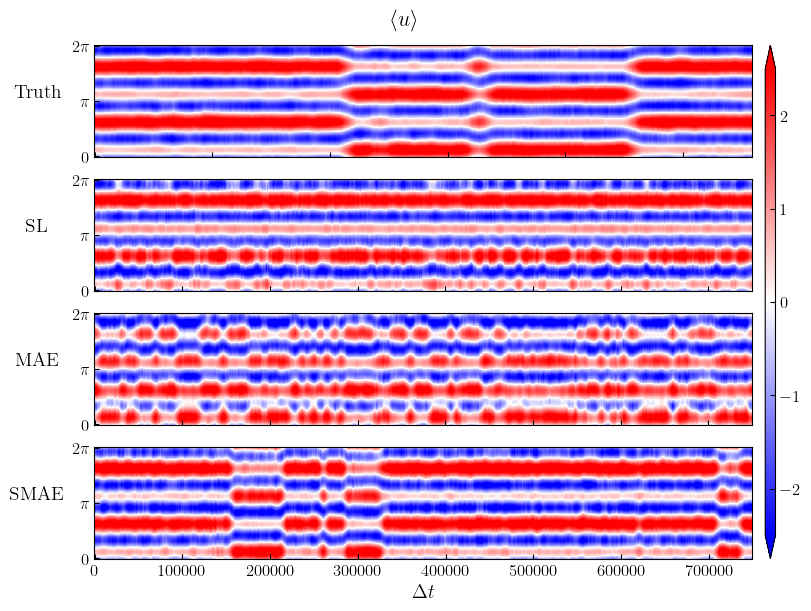

In [8]:
################### Zonal Mean ###################
var = 'U'
subsample = 100

num_snapshots = 750000

window_size = num_snapshots//subsample // 100

Ny = 256
colormap = 'bwr'
contourLevels = 100


fig, axes = plt.subplots(4,1,figsize=(8, 6), layout="compressed")  # Adjust figure size as needed

for count, ax in enumerate(axes.flatten()):
    if count == 0:
        data = np.load(data_dir_truth + 'zonal_' + var + '.npz')
        title = 'Truth'
    elif count == 1:
        data = np.load(data_dir_base + 'zonal_' + var + '.npz')
        title = 'SL'
    elif count == 2:
        data = np.load(data_dir_mae + 'zonal_' + var + '.npz')
        title = 'MAE'
    elif count == 3:
        data = np.load(data_dir_smae + 'zonal_' + var + '.npz')
        title = 'SMAE'

    if var == 'U':
        var_zonal = data['U_zonal']
    elif var == 'V':
        var_zonal = data['V_zonal']
    elif var == 'Omega':
        var_zonal = data['Omega_zonal']

    if count == 0:
        var_zonal = var_zonal[::3, :]

    var_zonal = var_zonal[:num_snapshots,:]
    var_zonal = var_zonal[::subsample, :]

    var_zonal = ndimage.uniform_filter1d(var_zonal, size=window_size, axis=0)


    x_axis = np.linspace(0, var_zonal.shape[0]*subsample, var_zonal.shape[0])
    yaxis = np.linspace(0, 2 * np.pi, Ny)

    vmax = 2.5
    contour = ax.pcolor(x_axis, yaxis, var_zonal.T, cmap=colormap, vmax=vmax, vmin=-vmax)

    if count == 3:
        ax.set_xlabel(r'$\Delta t$')
    else:
        ax.set_xticklabels([])

    ax.set_yticks([0, np.pi, 2*np.pi])
    ax.set_yticklabels(['0', r'$\pi$', r'$2\pi$'])
    # ax.set_ylabel('Y', rotation=0)
    ax.set_ylabel(title, rotation=0, labelpad=25)

# Add a single colorbar for all subplots
cbar = fig.colorbar(contour, ax=axes, shrink=1, aspect=50, pad=0.02, extend='both')
# cbar.set_label(r'$\langle u \rangle$', rotation=0, labelpad=20)

plt.suptitle(r'$\langle u \rangle$')
plt.savefig('figures/zonal_mean_' + var + '.png', dpi=600, bbox_inches='tight')
# Adjust layout


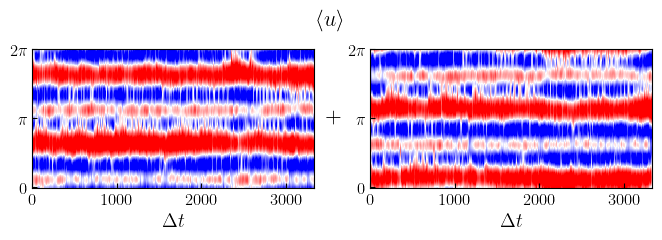

In [44]:
################### Zonal Mean ###################
data_dir_truth = '/ocean/projects/atm170004p/jakhar/2d_emulator_vision/SSL-for-2D-Turbulence/results/BASE/BASE_seed_0_2phase_1000epochs/analysis/truth/'

var = 'U'
subsample = 1

# window_size = num_snapshots//subsample // 100

Ny = 256
colormap = 'bwr'
contourLevels = 100

spin_up = 5000
regimeA = [200000 - spin_up,210000 - spin_up]
regimeB = [995000 - spin_up,1005000 - spin_up]


data = np.load(data_dir_truth + 'zonal_' + var + '.npz')
title = 'Truth'

fig, axes = plt.subplots(1,2,figsize=(8, 1.8))  # Adjust figure size as needed
plt.subplots_adjust(wspace=0.2)  # Increase this value for more space

for count, ax in enumerate(axes.flatten()):


    if var == 'U':
        var_zonal = data['U_zonal']
    elif var == 'V':
        var_zonal = data['V_zonal']
    elif var == 'Omega':
        var_zonal = data['Omega_zonal']

    if count == 0:
        var_zonal = var_zonal[regimeA[0]:regimeA[1], :]
    elif count == 1:
        var_zonal = var_zonal[regimeB[0]:regimeB[1], :]

    var_zonal = var_zonal[::3, :]

    # var_zonal = var_zonal[:num_snapshots,:]
    var_zonal = var_zonal[::subsample, :]

    # var_zonal = ndimage.uniform_filter1d(var_zonal, size=window_size, axis=0)

    x_axis = np.linspace(0, var_zonal.shape[0]*subsample, var_zonal.shape[0])
    yaxis = np.linspace(0, 2 * np.pi, Ny)

    vmax = 2.5
    contour = ax.pcolor(x_axis, yaxis, var_zonal.T, cmap=colormap, vmax=vmax, vmin=-vmax)

    ax.set_xlabel(r'$\Delta t$')

    ax.set_yticks([0, np.pi, 2*np.pi])
    ax.set_yticklabels(['0', r'$\pi$', r'$2\pi$'])
    # ax.set_ylabel('Y', rotation=0)
    # ax.set_ylabel(title, rotation=0, labelpad=25)
fig.text(0.503, 0.5, r'$+$', ha='center', va='center', fontsize=BIGGER_SIZE)
fig.suptitle(r'$\langle u \rangle$', y=1.1)

plt.savefig('figures/zonal_mean_train_' + var + '.png', dpi=600, bbox_inches='tight')
# Adjust layout


In [ ]:
from py2d.initialize import initialize_wavenumbers_rfft2
from py2d.convert import Omega2UV

import scipy.io as sio
import matplotlib.animation as animation
from py2d.convert import Omega2Psi, Psi2UV

data_dir = '/ocean/projects/phy220045p/jakhar/py2d_dealias/results/Re5000_fkx0fky4_r0.1_b20/NoSGS/NX256/dt0.0002_IC1/data/'


nx, ny = 256, 256
Lx, Ly = 2 * np.pi, 2 * np.pi
Kx, Ky, _, _, invKsq = initialize_wavenumbers_rfft2(nx, ny, Lx, Ly, INDEXING='ij')

U_arr, V_arr, Omega_arr = [], [], []


for file_num in range(200000,200100):
    data = sio.loadmat(data_dir + f'{file_num}.mat')
    Omega = data['Omega']
    U,V = Omega2UV(Omega, Kx, Ky, invKsq)

    U_arr.append(U)
    V_arr.append(V)
    Omega_arr.append(Omega)

# Convert to numpy arrays for easier handling
U_arr = np.array(U_arr)
V_arr = np.array(V_arr)
Omega_arr = np.array(Omega_arr)

print(f"Loaded {len(U_arr)} time steps")
print(f"U shape: {U_arr[0].shape}")
print(f"V shape: {V_arr[0].shape}")  
print(f"Omega shape: {Omega_arr[0].shape}")



Loaded 100 time steps
U shape: (256, 256)
V shape: (256, 256)
Omega shape: (256, 256)


MovieWriter ffmpeg unavailable; using Pillow instead.


Creating animation...
Trying to save animation as MP4...
MP4 save failed (ffmpeg not available): unknown file extension: .mp4
Saving animation as GIF instead...
MP4 save failed (ffmpeg not available): unknown file extension: .mp4
Saving animation as GIF instead...
GIF animation saved successfully!
GIF animation saved successfully!


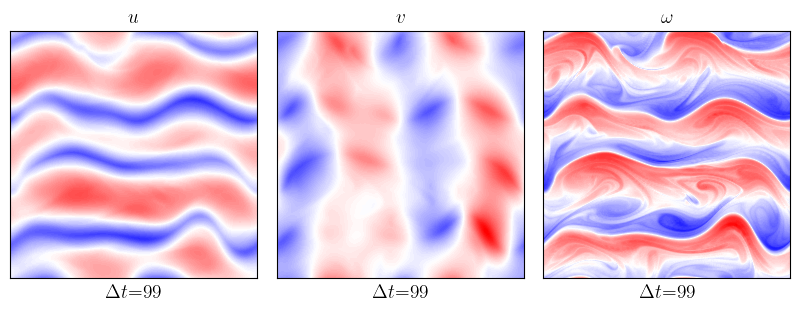

In [65]:
################### Create Animation ###################

contourLevels = 100


# Set up the figure and axes for animation
fig, axes = plt.subplots(1, 3, figsize=(8, 3), layout='constrained')

# Calculate global min/max for consistent color scaling
vmax_U = np.max(np.abs(U_arr))
vmax_V = np.max(np.abs(V_arr))
vmax_Omega = np.max(np.abs(Omega_arr))

# Create coordinate grids for plotting
x = np.linspace(0, 2*np.pi, nx)
y = np.linspace(0, 2*np.pi, ny)
X, Y = np.meshgrid(x, y)

# Set up initial plot titles and formatting (will be updated in animation)
for i, (ax, var_name) in enumerate(zip(axes, ['$u$', '$v$', '$\omega$'])):
    ax.set_title(var_name)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])


def animate(frame):
    """Animation function that updates the contour plots for each frame"""
    # Clear previous contours
    for ax in axes:
        ax.clear()
    
    # Create new contour plots for current frame
    data_arrays = [U_arr[frame], V_arr[frame], Omega_arr[frame]]
    vmaxs = [vmax_U, vmax_V, vmax_Omega]
    var_names = ['$u$', '$v$', '$\omega$']
    
    for i, (ax, data, vmax, var_name) in enumerate(zip(axes, data_arrays, vmaxs, var_names)):
        contour = ax.contourf(data.T, levels=contourLevels, cmap=colormap, vmax=vmax, vmin=-vmax)
        ax.set_title(f'{var_name}')
        ax.set_xlabel(rf'$\Delta t$={frame}')
        ax.set_aspect('equal')
        ax.set_xticks([])
        ax.set_yticks([])
    
    return axes

# Create the animation
print("Creating animation...")
anim = animation.FuncAnimation(fig, animate, frames=len(U_arr), interval=200, blit=False, repeat=True)

# Try to save as MP4 first, fall back to GIF if ffmpeg is not available
try:
    print("Trying to save animation as MP4...")
    anim.save('figures/U_V_Omega.mp4', writer='ffmpeg', fps=5, dpi=300, bitrate=1800)
    print("MP4 animation saved successfully!")
except Exception as e:
    print(f"MP4 save failed (ffmpeg not available): {e}")
    print("Saving animation as GIF instead...")
    anim.save('figures/U_V_Omega.gif', writer='pillow', fps=5, dpi=150)
    print("GIF animation saved successfully!")
plt.show()